epoch 0 finished


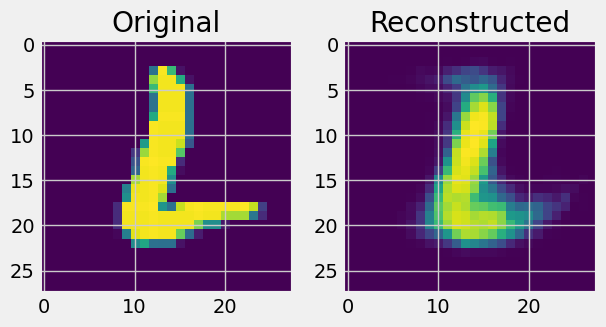

epoch 1 finished


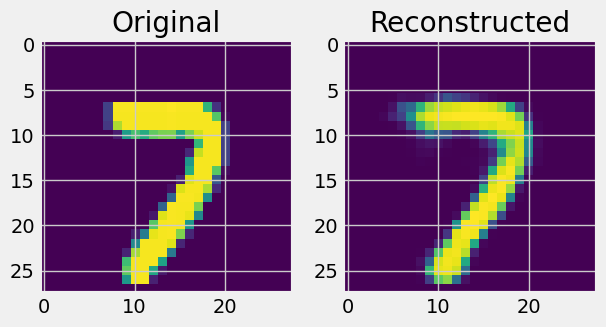

epoch 2 finished


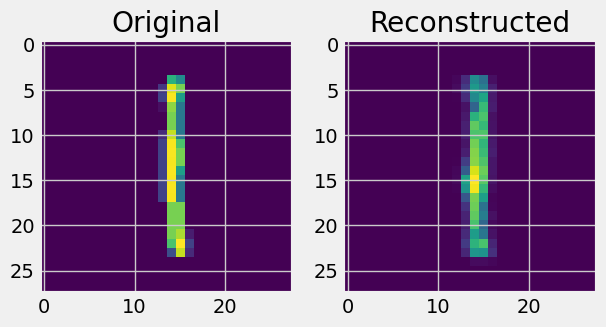

epoch 3 finished


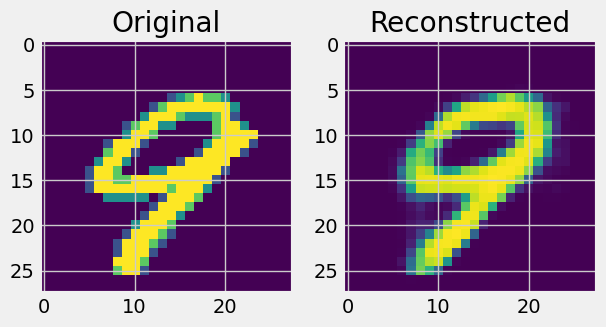

epoch 4 finished


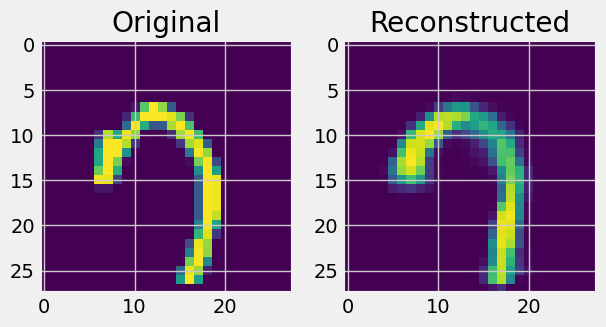

epoch 5 finished


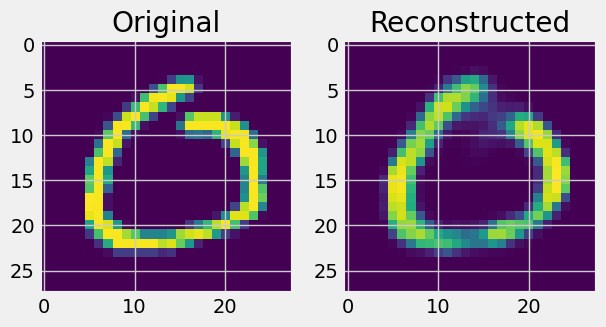

epoch 6 finished


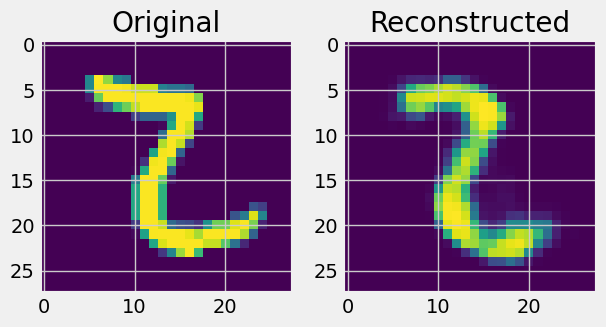

epoch 7 finished


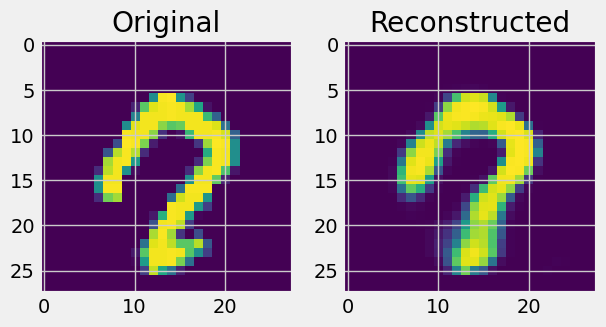

epoch 8 finished


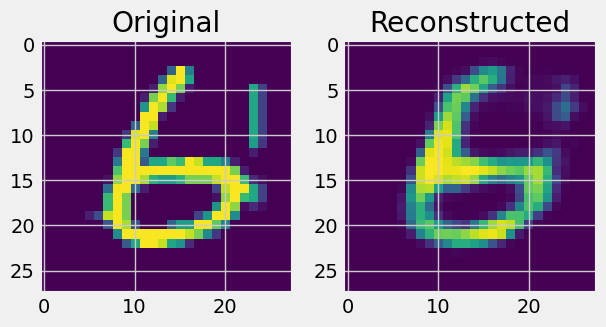

epoch 9 finished


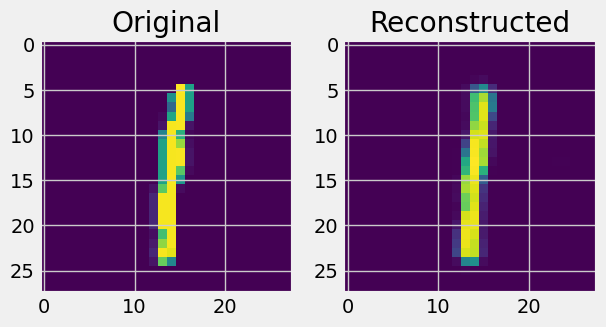

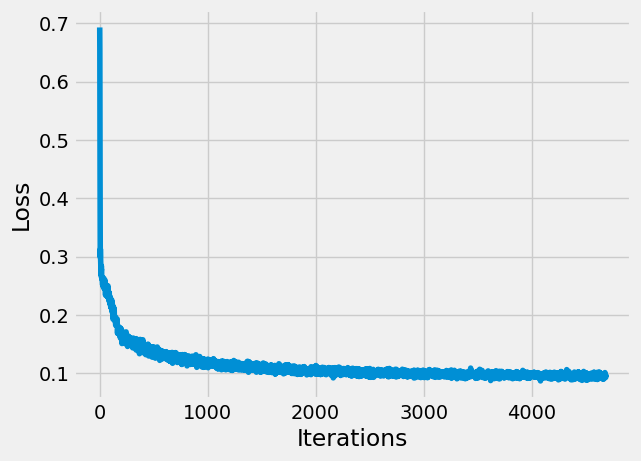

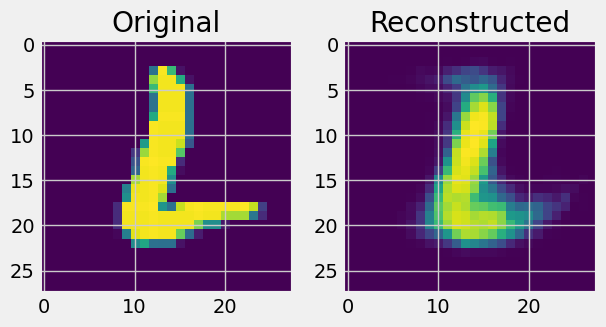

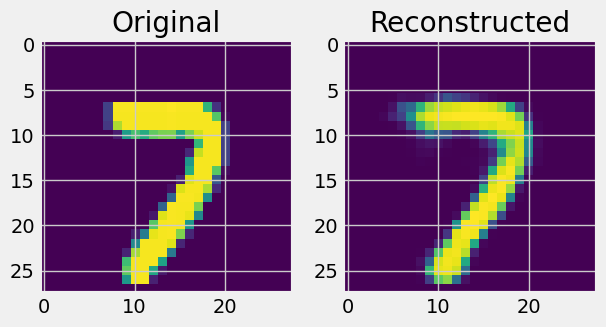

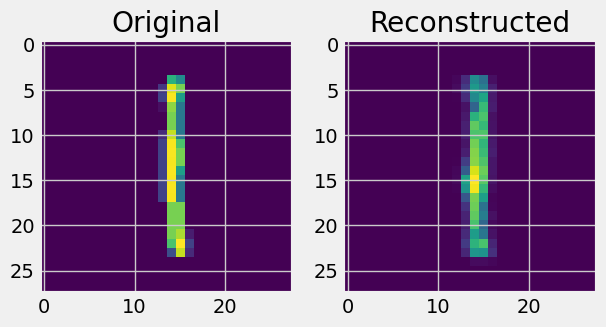

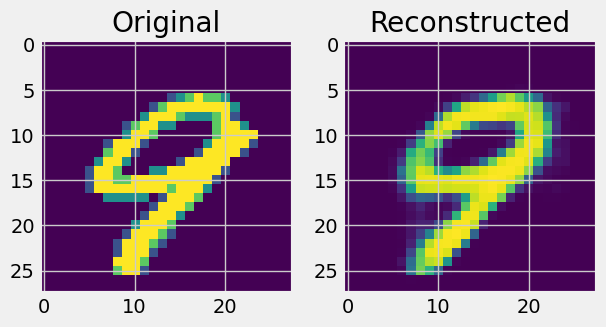

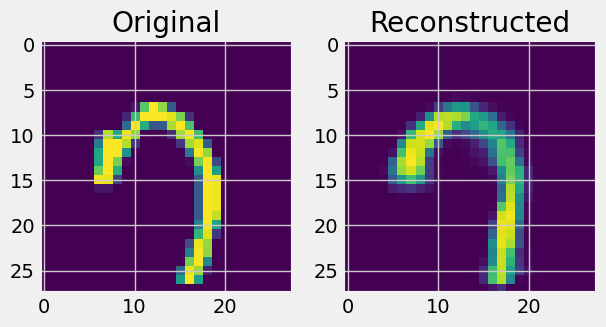

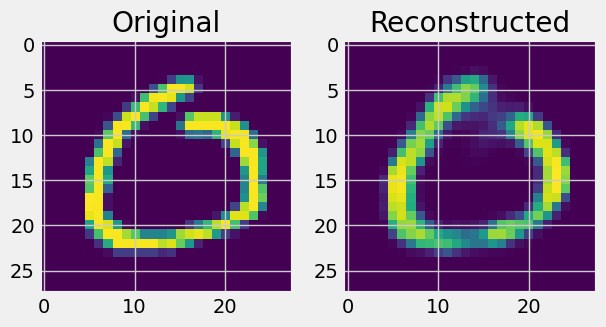

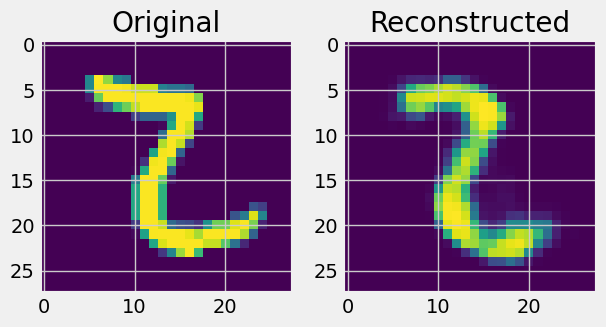

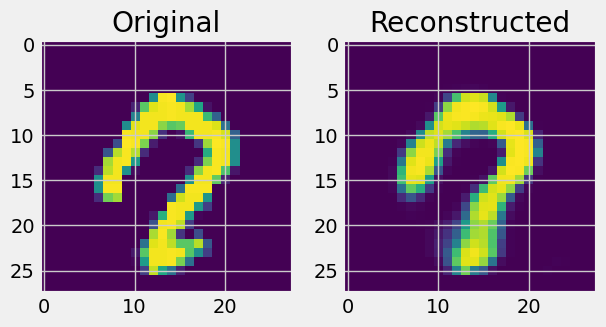

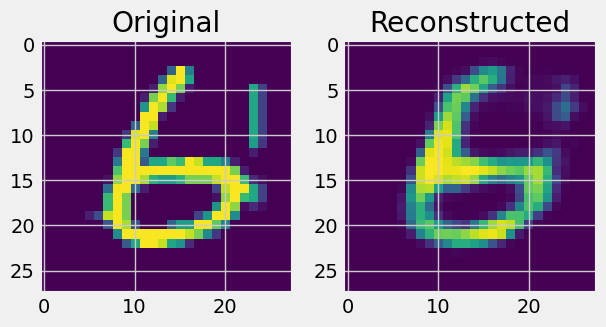

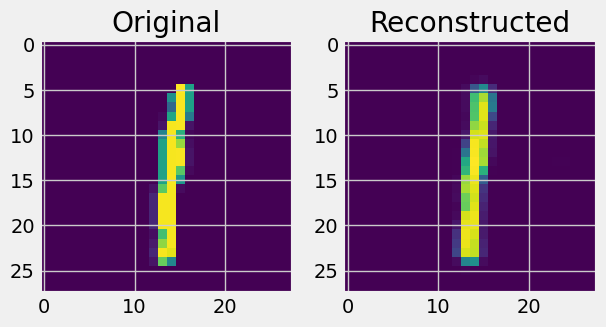

In [5]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
         
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36)
        )
         
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

def plot_outputs(outputs):
    for _, image, reconstructed in outputs:
        f, axarr = plt.subplots(1, 2)
        axarr[0].imshow(image.reshape(28, 28))
        axarr[0].set_title("Original")
        axarr[1].imshow(reconstructed.reshape(28, 28))
        axarr[1].set_title("Reconstructed")
        plt.show()

tensor_transform = transforms.ToTensor()
 
dataset = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)
 
loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 128,
                                     shuffle = True)

model = AE()
loss_function = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-2,
                             weight_decay = 1e-8)

epochs = 10
outputs = []
losses = []
for epoch in range(epochs):
    for (image, _) in loader:
        image = image.reshape(-1, 28*28)

        reconstructed = model(image)
        loss = loss_function(reconstructed, image)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.detach().numpy())
    print('epoch', epoch, 'finished')
    outputs.append((epoch, image[0].detach().numpy(), reconstructed[0].detach().numpy()))
    plot_outputs(outputs[-1:])

plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.plot(losses)
plt.show()

plot_outputs(outputs)
